In [1]:
import pandas as pd
import numpy as np
import statistics as st
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
from scipy import stats
# Let's employ ANOVA
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [8]:
def file_opener(adress, invert=False):
    """ Open and cut our file"""
    df_coll = pd.read_excel(adress,sheet_name=None, header=None)
    list_df=[]
    for it in df_coll.values():
        ''' converting angle if needed'''
        if invert==True:
            list_df.append(180-pd.DataFrame(it).loc[1:,1:])
        else:
            list_df.append(pd.DataFrame(it).loc[1:,1:])
    return list_df

def CutMean(list_of_df, cut_from=0, cut_to=-1):
    """Cutting off a non-linear part of the curve 
    and extracting mean for each plant"""
    data_cut_mean=[]
    for datafr in list_of_df:
        data_cut_mean.append(datafr.iloc[cut_from:cut_to,:].apply(np.mean, axis=0))
    return data_cut_mean

def tukefying(list_of_means):
    '''Converting the data to the edible format for the TukeyHSD'''
    listOM_concat = np.concatenate(list_of_means)
    return pd.DataFrame({'Value': listOM_concat,
                   'Line': np.repeat(['WT', 'PIN7a', 'PIN7b', 'pin7_2'], repeats=len(listOM_concat)/4)})

In [9]:
data = file_opener('2021.04_phototropism.xlsx', invert=True)
means_per_line=CutMean(data,8,-1)
means_ready_to_THSD = tukefying(means_per_line)


In [10]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=means_ready_to_THSD['Value'],
                          groups=means_ready_to_THSD['Line'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 PIN7a  PIN7b -14.6934 0.0167 -27.3493 -2.0375   True
 PIN7a     WT  -0.9775    0.9 -13.6334 11.6785  False
 PIN7a pin7_2 -17.9296 0.0023 -30.5856 -5.2737   True
 PIN7b     WT  13.7159 0.0287     1.06 26.3719   True
 PIN7b pin7_2  -3.2362    0.9 -15.8922  9.4197  False
    WT pin7_2 -16.9522 0.0043 -29.6081 -4.2962   True
-----------------------------------------------------


In [54]:
pd.DataFrame(tukey.summary()).to_excel('phototrop_assympt_mean_tukey_output.xlsx')
means_ready_to_THSD.to_excel('phototrop_assympt_means_for_plot.xlsx')

C:\Users\kashk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


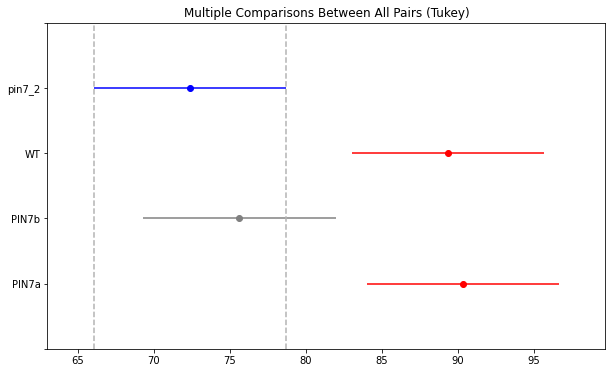

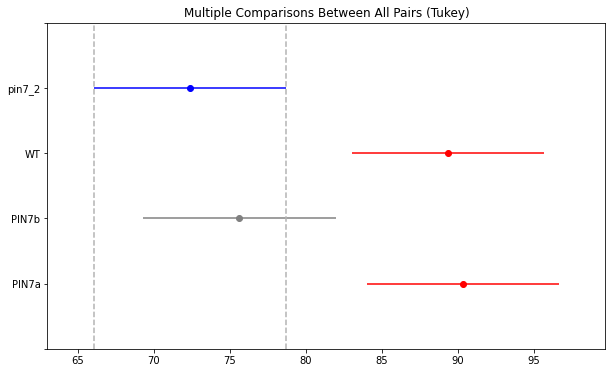

In [11]:
from statsmodels.stats.multicomp import MultiComparison
data=MultiComparison(means_ready_to_THSD['Value'], means_ready_to_THSD['Line'])
results=data.tukeyhsd()


results.plot_simultaneous(comparison_name="pin7_2")